In [23]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

In [24]:
# Cargar datos
path_datos = os.path.join('..','..','Datos','Limpios')
df2 = pd.read_csv(os.path.join(path_datos,'datos2_limpios.csv'), index_col=0)

df2_limpio = df2.drop(['Porcentaje Ahorro (%)', 'Ahorro Actual (€)', 'Gasto Mensual (€)',
                        'Vida Esperada (años)', 'Edad de Jubilación'], axis=1)

In [25]:
# Definir variables de entrada y salida
X = df2_limpio.drop(columns=['Años Hasta Jubilación'])
y = df2_limpio['Años Hasta Jubilación']


In [26]:
X

,Edad,Ingreso Anual (€)
0,32,29353.06
1,51,39218.38
2,32,15000.00
3,30,23517.91
4,60,20867.64
...,...,...
4995,58,23759.51
4996,46,15000.00
4997,51,23620.10
4998,61,15000.00


In [27]:
y

0       35
1       16
2       33
3       37
4        2
        ..
4995     7
4996    17
4997    12
4998     3
4999    25
Name: Años Hasta Jubilación, Length: 5000, dtype: int64

In [28]:

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
X_train.head()

,Edad,Ingreso Anual (€)
2858,27,15000.00
1559,27,21523.70
1441,33,27638.63
2179,63,25537.35
1390,40,100000.00


In [30]:
X_test.head()

,Edad,Ingreso Anual (€)
398,41,30218.77
3833,42,16951.94
4836,61,20580.65
4572,29,19677.56
636,42,23407.20


In [31]:
y_train.head()

2858    36
1559    40
1441    32
2179     0
1390    22
Name: Años Hasta Jubilación, dtype: int64

In [32]:
y_test.head()

398     24
3833    23
4836     6
4572    35
636     23
Name: Años Hasta Jubilación, dtype: int64

In [33]:
# Modelo con Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      random_state=0)

In [34]:
# Evaluar modelo
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, R2: {r2}')


MAE: 1.5058436318589508, R2: 0.9793092935677211


In [36]:
mape = (np.abs(y_test - y_pred) / y_test).mean() * 100
print(f'MAPE: {mape:.2f}%')

MAPE: inf%


In [11]:
# Cargar nuevo dataset
df = pd.read_csv(os.path.join(path_datos, 'datos1_limpios.csv'), index_col=0)

In [12]:
df.head()

,ID,FECHA NAC,SEXO,NOMINA BRUTA 01/01/2025,FECHA ENTRADA,PARA CONTAR MESES,EDAD
0,1,1974-03-22,H,15319.07,2002-05-01,2002-05-01,51
1,2,1995-06-21,M,19168.80,2018-04-13,2018-05-01,30
2,3,1973-06-07,H,18719.86,2002-04-01,2002-04-01,52
3,4,1975-07-03,M,12942.60,2002-04-01,2002-04-01,50
4,5,1976-07-19,M,20158.08,2003-04-01,2003-04-01,49


In [13]:
X_2 = df.drop(['ID', 'FECHA NAC', 'SEXO', 'FECHA ENTRADA', 'PARA CONTAR MESES'], axis=1)

In [14]:
X_2.columns = ['Ingreso Anual (€)','Edad']
X_2 = X_2[['Edad','Ingreso Anual (€)']] 
X_2

,Edad,Ingreso Anual (€)
0,51,15319.07
1,30,19168.80
2,52,18719.86
3,50,12942.60
4,49,20158.08
...,...,...
95,50,25222.69
96,34,18759.95
97,26,22175.25
98,36,25972.71


In [15]:
# Predecir
predicciones = best_model.predict(X_2)
df['AÑOS HASTA JUBILACION'] = predicciones
df['EDAD DE JUBILACION'] = df['EDAD'] + df['AÑOS HASTA JUBILACION']

df.head()

,ID,FECHA NAC,SEXO,NOMINA BRUTA 01/01/2025,FECHA ENTRADA,PARA CONTAR MESES,EDAD,AÑOS HASTA JUBILACION,EDAD DE JUBILACION
0,1,1974-03-22,H,15319.07,2002-05-01,2002-05-01,51,14.323191,65.323191
1,2,1995-06-21,M,19168.80,2018-04-13,2018-05-01,30,34.389066,64.389066
2,3,1973-06-07,H,18719.86,2002-04-01,2002-04-01,52,11.932434,63.932434
3,4,1975-07-03,M,12942.60,2002-04-01,2002-04-01,50,14.618663,64.618663
4,5,1976-07-19,M,20158.08,2003-04-01,2003-04-01,49,15.415805,64.415805


In [16]:
df['EDAD DE JUBILACION'].unique()

array([65.32319053, 64.38906581, 63.93243435, 64.6186635 , 64.41580489,
       64.89502705, 64.97074706, 63.13755531, 64.40471007, 63.93077408,
       63.82473105, 63.55385043, 64.76547442, 64.26675418, 63.52049133,
       64.53280474, 64.98266177, 64.30074314, 64.20196016, 63.51204143,
       64.47201873, 64.17196339, 63.6981182 , 63.7221852 , 64.67022683,
       65.37147174, 64.7666294 , 64.58099635, 63.86198092, 64.46821029,
       64.35216001, 64.35100228, 64.52118636, 66.09606936, 64.54464115,
       64.52830477, 64.44350114, 63.06526738, 63.70847577, 63.77021417,
       63.72585828, 64.17290821, 64.23843488, 65.20371485, 63.43766413,
       63.87280575, 64.05894665, 65.5845882 , 63.84752238, 64.51756332,
       63.75539435, 64.80401754, 64.38709541, 64.6030179 , 64.3192287 ,
       63.64582013, 64.5693596 , 64.9686325 , 64.73420589, 64.48596532,
       64.80739704, 63.5872425 , 65.20426751, 63.7240924 , 63.8337797 ,
       64.7409507 , 65.30233855, 65.23854782, 64.34067792, 64.78

<Axes: >

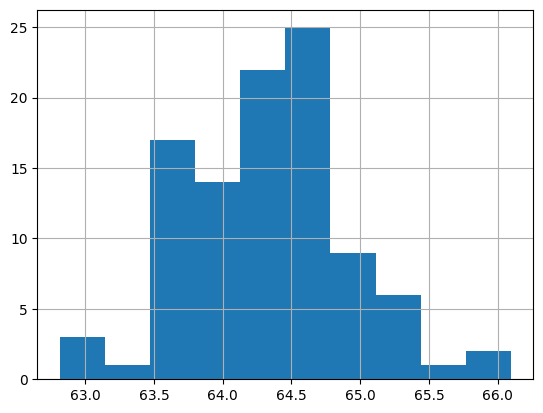

In [19]:
df['EDAD DE JUBILACION'].hist()

In [17]:
df['EDAD DE JUBILACION'].max()

np.float64(66.09606936017923)

In [18]:
df['EDAD DE JUBILACION'].min()

np.float64(62.815246036859946)